### **Decision Tree:**
1. Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
2. In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.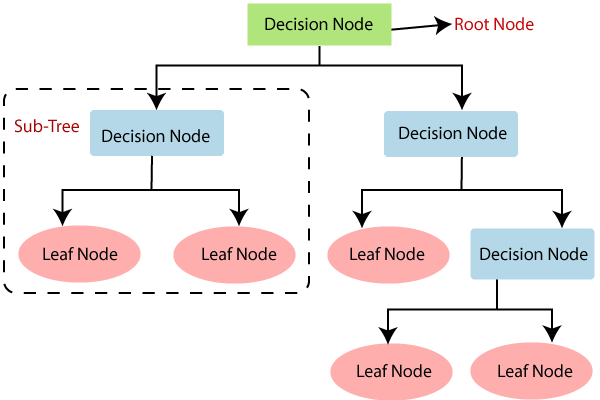

### Why use Decision Trees?
There are various algorithms in Machine learning, so choosing the best algorithm for the given dataset and problem is the main point to remember while creating a machine learning model. Below are the two reasons for using the Decision tree:

1. Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
2. The logic behind the decision tree can be easily understood because it shows a tree-like structure.

### How does the Decision Tree algorithm Work?

In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.

For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process until it reaches the leaf node of the tree. The complete process can be better understood using the below algorithm:
1. Begin the tree with the root node, says S, which contains the complete dataset.
2. Find the best attribute in the dataset using Attribute Selection Measure (ASM).
3. Divide the S into subsets that contains possible values for the best attributes.
4. Generate the decision tree node, which contains the best attribute.
5. Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

### Import all the required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # For selection the model and Split the data
from sklearn import tree  # For Decision Tree
from sklearn.metrics import accuracy_score,confusion_matrix  # For check the performance of the model
import seaborn as sns    # Seaborn for data Visualization  
import matplotlib.pyplot as plt   # For Data Visualization

### Create Dataset and read first 5 dataset

### Full information about the dataset in kaggle

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [2]:
data = 'heart.csv' 
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Check the null value from the dataset.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Wanna check the datatypes:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Here the target column is denoting the patient is having heart desease or not?


drop():- The drop() method removes the specified row or column. By specifying the column axis ( axis='columns' ), the drop() method removes the specified column.

In [3]:
#x=insurance.loc[:,['age','bmi','children','Claim_Amount','past_consultations','num_of_steps','Hospital_expenditure','NUmber_of_past_hospitalizations','Anual_Salary']]
#y=insurance.iloc[:,:-1]  # Everything except the last column
#y=insurance.iloc[:,-1]   all the rows and only last column

X = df.drop(columns=['target'])  # Independent Variables
y = df['target']                 # Dependent Variables/ target column
print(X.shape)    # Check the shape of the X variables
print(y.shape)    # Check the shape of Y Variables

(303, 13)
(303,)


The size of the dataset is small, In this case there is possible to get high accuracy

### Split the data into train_set and test_set.

Always remember that take more data from train the model and less data for test the model

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


### tree.DecisionTreeClassifier():
Decision tree construction does not involve any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery. Decision trees can handle multidimensional data.

In [10]:
clf = tree.DecisionTreeClassifier()   #Create the model for Decision tree classifier.
clf.fit(x_train,y_train)              # fit the train data into the model
y_train_pred = clf.predict(x_train)   # Predict the train data
y_test_pred = clf.predict(x_test)      # Predict the test data

### Create a function for confusion matrix and plot it into heatmap.
Confusion_Matrix:- A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

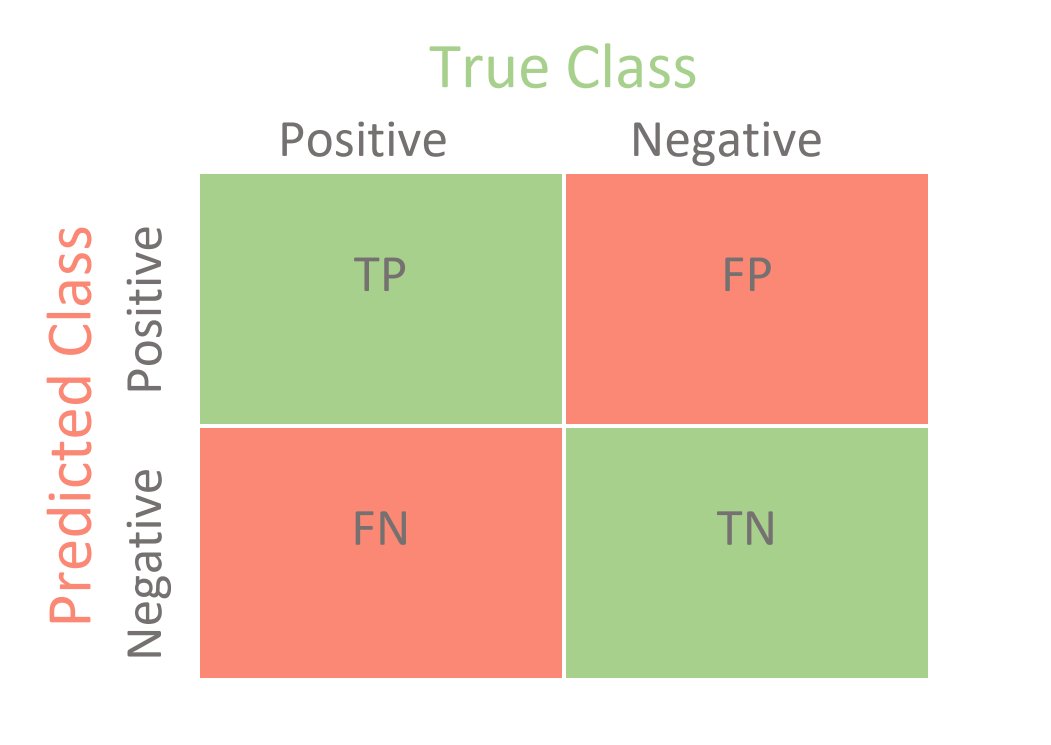

# Three variable

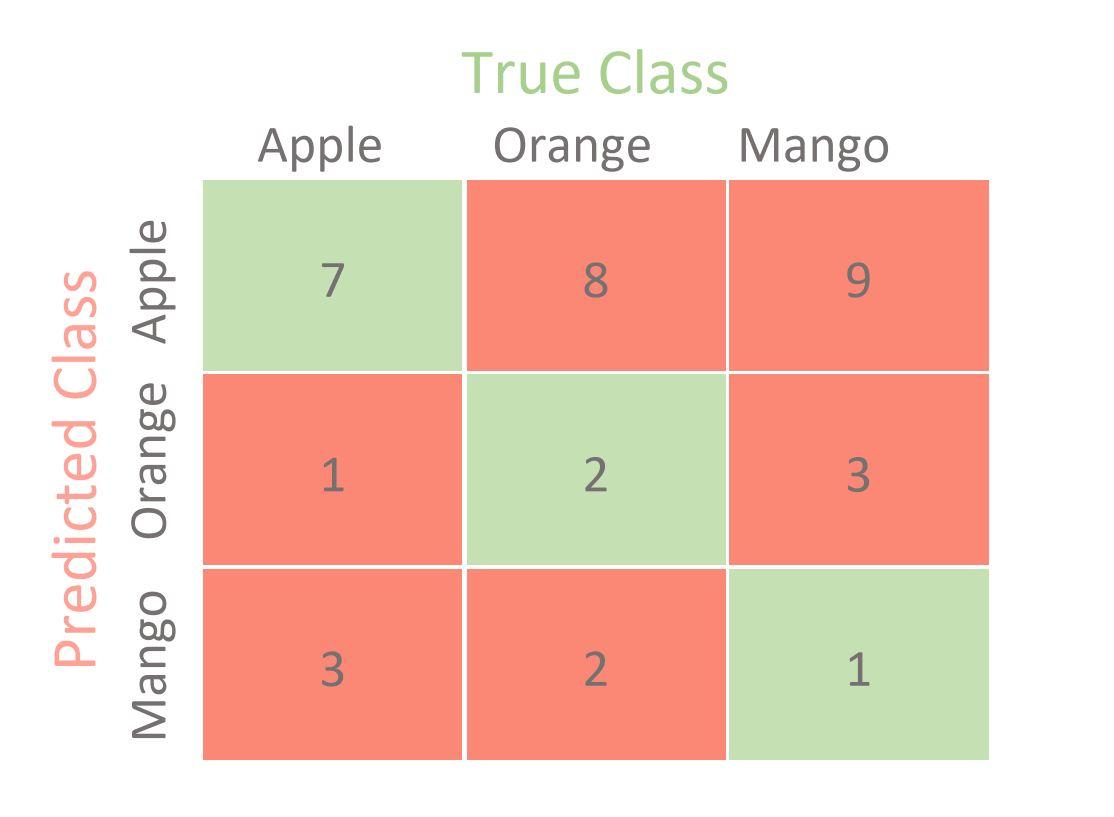


The f means Formatted string literals and it's new in Python 3.6.

A formatted string literal or f-string is a string literal that is prefixed with 'f' or 'F'. These strings may contain replacement fields, which are expressions delimited by curly braces {}. While other string literals always have a constant value, formatted strings are really expressions evaluated at run time.

In [11]:
# helper function to create a confusion_matrix and plot into heatmap
def plot_confusionmatrix(y_train_pred,y_train,dom):  # dom is noting but it is the lable when we plot the confusion matrix.
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train) # Calculate the confusion matrix on top of train dataset
    sns.heatmap(cf,annot=True,cmap='Blues', fmt='g')#For g and G , the maximum number of significant digits
    # annot: annotation ---annot: If True, write the data value in each cell
    #cmap:- You can customize the colors in your heatmap with the cmap parameter of the heatmap() function in seaborn.
    #fmt:- The annot only help to add numeric value on python heatmap cell
    # but fmt parameter allows to add string (text) values on the cell.

    plt.tight_layout()  # The tight_layout() function in pyplot module of matplotlib library 
    #is used to automatically adjust subplot parameters to give specified padding
    plt.show()

### Ploating the heatmap by using the upper dunction

The scikit learn accuracy_score works with multilabel classification in which the accuracy_score function calculates subset accuracy. The set of labels that predicted for the sample must exactly match the corresponding set of labels in y_true. Accuracy that defines how the model performs all classes

In [12]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 1.0
Test score 0.7142857142857143


Train Confusion matrix


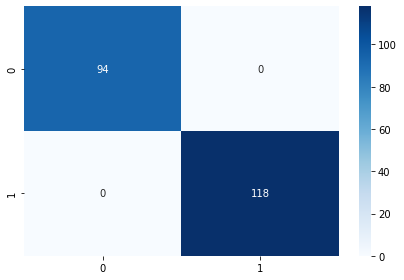

Test Confusion matrix


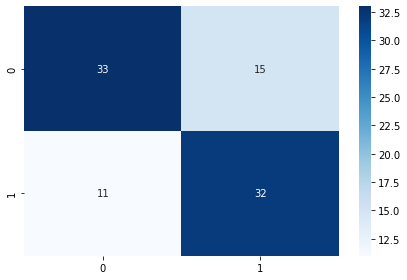

In [13]:

plot_confusionmatrix(y_train_pred,y_train,dom='Train')    # this is for the train dataset
plot_confusionmatrix(y_test_pred,y_test,dom='Test')   # This is for the test dataset

In [14]:
#               Actual Values
#predicted       1   0
#             1  TP  FP
#             0  FN  TN 

### max_depth: 
This determines the maximum depth of the tree. In our case, we use a depth of two to make our decision tree. The default value is set to none. This will often result in over-fitted decision trees.

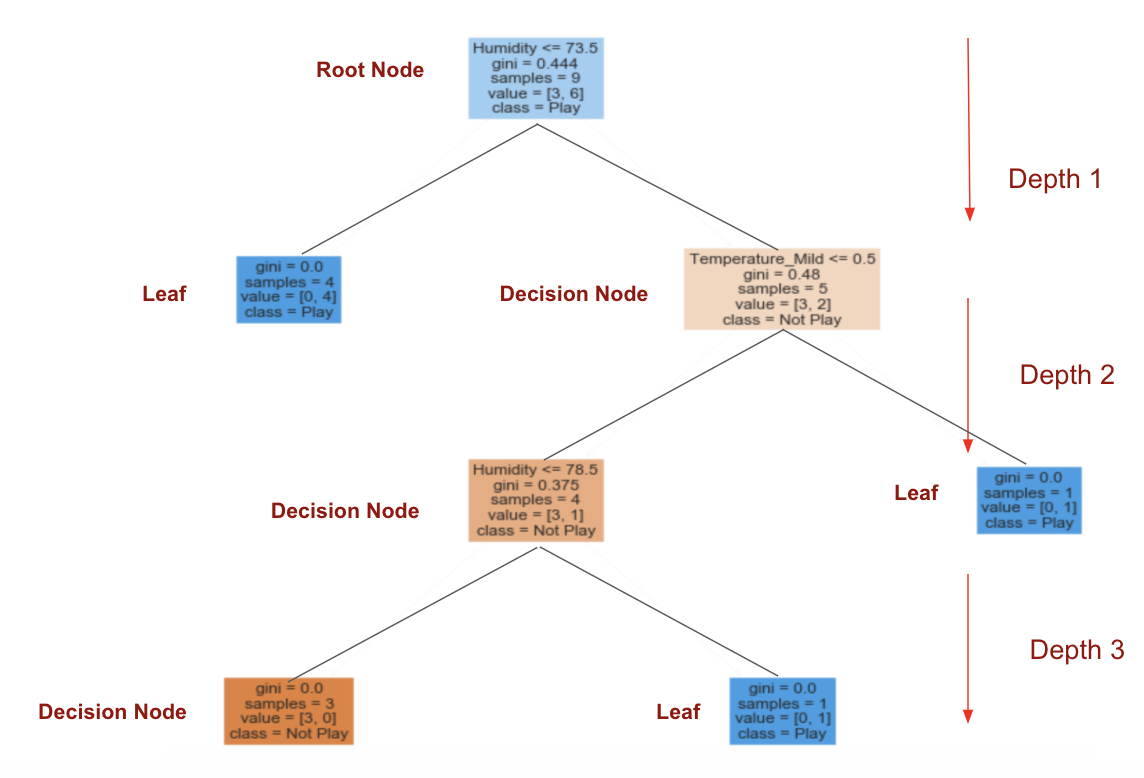

In [15]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])    # Create a empty data frame to store the max depth
for input_parameter in c_parameter_values:   # Using for loop for repeating the same task
    model = tree.DecisionTreeClassifier(max_depth=input_parameter,splitter='best')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100   # Find the accuracy score and mul by 100 to find the percentage of the accuracy.
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True) 
    # append the data into DataFrame
   
print(df)
print("")

    max_depth   accuracy
0         1.0  76.923077
1         2.0  73.626374
2         3.0  81.318681
3         4.0  76.923077
4         5.0  73.626374
5         6.0  72.527473
6         7.0  75.824176
7         8.0  71.428571
8         9.0  74.725275
9        10.0  71.428571
10       11.0  72.527473
11       12.0  74.725275
12       13.0  74.725275
13       14.0  72.527473
14       15.0  71.428571



### classification_report:
The classification report visualizer displays the precision, recall, F1, and support scores for the model. There are four ways to check if the predictions are right or wrong: TN / True Negative: the case was negative and predicted negative. TP / True Positive: the case was positive and predicted positive.

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        48
           1       0.68      0.74      0.71        43

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



In [12]:
#recall->tp / (tp + fn)
#The recall is the measure of our model correctly identifying True Positives. 
#Thus, for all the customers who actually have heart disease, recall tells us how many we correctly identified as a heart patient.

#precision of class 0 = TP of class 0/total number of object 
#What is the Precision for our model? Yes, it is 0.843 or, when it predicts that a patient has heart disease, it is correct around 84% of the time.
#precision of class 1 = TP of class 1/total number of object 

#macro average = (precision of class 0 + precision of class 1)/2 

#weighted average is precision of all classes merge together
#weighted average = (TP of class 0 + TP of class 1)/(total number of class 0 + total number of class 1) 

#F1-score is a measure of a model's accuracy on a dataset
#a good F1 score means that you have low false positives and low false negatives, 
#Accuracy is used when the True Positives and True negatives are more important while 
#F1-score is used when the False Negatives and False Positives are crucial.
#Support is the number of actual occurrences of the class in the specified dataset.